<p style = 'color:#E6E4E7 ; background-color:#00561B ; text-align:center ; font-size: 300%'> Speed Dating project

<p style = 'color:#00561B ; background-color:#E6E4E7 ; text-align:center ; font-size: 150%'> Project prepared by Stephanie Cotineau - #dsmpt-Paris-08

<p style = 'color:#00561B ; font-size: 200%'> 1. Context & objectives<a name="P1"></a>

* This dataset is about **speed dating**. The data has been collected during speed dating events from 2002 to 2004. Attendees had a four-minute "first-date". At the end of the four minutes, participants were asked if they **would like to see their date again and to rate it on six attributes: attractiveness, sincerity, intelligence, fun, ambition, shared interests/hobbies**.

* The main goal of this analysis is to understand the **criterias that influence/drive the getting of a second date** (variable 'dec' = "would like to see the partner again").
* A quick overview of the dataset and major KPIs are also available in this analysis.

<p style = 'color:#00561B ; font-size: 200%'> 2. Importation of librairies and data file<a name="P1"></a>

In [1]:
# Importation of libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Loading of data
df = pd.read_csv('Speed Dating Data.csv', encoding= 'unicode_escape') 
# Error message, find code line 'encoding...' on stackoverflow to solve problem

<p style = 'color:#00561B ; font-size: 200%'> 3. Check of data quality<a name="P1"></a>

<hr>

<p style = 'color:#00561B ; font-size: 150%'> Warnings on data quality and key take away :<a name="P1"></a>

> Lots of variables/columns have **missing values**, due to the 'structure' of the survey = barometric/panelist interviews with several followups of the interviewees (the day of the event, the day after participating in the speed dating event, then 3-4 weeks after seen their matches).
> Barometric/panelist method implies that a same person is interviewed several times (for each followups) creating missing values when no second date happen. Besides, a participant met several potential dates creating duplicates (same respondent answering several questionnaires according to speed dating first appointments).

> To ease the manipulation of the dataset, a light version of it has been created (df_light) and kept variables with enough data  and relevant variables to answer the initial question. Based on this light version, a matrix of correlation has been created to identify the criterias with the highest influence to get a second date (variable = 'match').

<hr>

In [3]:
# Shape of dataset
df.shape

(8378, 195)

In [4]:
# List of columns index, columns names and type of data
df.info(verbose = True)
# Add 'verbose = True' to get information on all 195 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 195 columns):
 #    Column    Dtype  
---   ------    -----  
 0    iid       int64  
 1    id        float64
 2    gender    int64  
 3    idg       int64  
 4    condtn    int64  
 5    wave      int64  
 6    round     int64  
 7    position  int64  
 8    positin1  float64
 9    order     int64  
 10   partner   int64  
 11   pid       float64
 12   match     int64  
 13   int_corr  float64
 14   samerace  int64  
 15   age_o     float64
 16   race_o    float64
 17   pf_o_att  float64
 18   pf_o_sin  float64
 19   pf_o_int  float64
 20   pf_o_fun  float64
 21   pf_o_amb  float64
 22   pf_o_sha  float64
 23   dec_o     int64  
 24   attr_o    float64
 25   sinc_o    float64
 26   intel_o   float64
 27   fun_o     float64
 28   amb_o     float64
 29   shar_o    float64
 30   like_o    float64
 31   prob_o    float64
 32   met_o     float64
 33   age       float64
 34   field     object 
 35 

In [5]:
df.head(20)

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
5,1,1.0,0,1,1,1,10,7,NaN,6,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
6,1,1.0,0,1,1,1,10,7,NaN,1,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
7,1,1.0,0,1,1,1,10,7,NaN,2,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
8,1,1.0,0,1,1,1,10,7,NaN,8,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
9,1,1.0,0,1,1,1,10,7,NaN,9,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [6]:
df.describe(include='all')

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,8378.000000,8377.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,6532.000000,8378.000000,...,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,283.675937,8.960248,0.500597,17.327166,1.828837,11.350919,16.872046,9.042731,9.295775,8.927668,...,7.240312,8.093357,8.388777,7.658782,7.391545,6.810020,7.615079,7.932540,7.155258,7.048611
std,158.583367,5.491329,0.500029,10.940735,0.376673,5.995903,4.358458,5.514939,5.650199,5.477009,...,1.576596,1.610309,1.459094,1.744670,1.961417,1.507341,1.504551,1.340868,1.672787,1.717988
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,...,2.000000,2.000000,3.000000,2.000000,1.000000,2.000000,2.000000,4.000000,1.000000,1.000000
25%,154.000000,4.000000,0.000000,8.000000,2.000000,7.000000,14.000000,4.000000,4.000000,4.000000,...,7.000000,7.000000,8.000000,7.000000,6.000000,6.000000,7.000000,7.000000,6.000000,6.000000
50%,281.000000,8.000000,1.000000,16.000000,2.000000,11.000000,18.000000,8.000000,9.000000,8.000000,...,7.000000,8.000000,8.000000,8.000000,8.000000,7.000000,8.000000,8.000000,7.000000,7.000000
75%,407.000000,13.000000,1.000000,26.000000,2.000000,15.000000,20.000000,13.000000,14.000000,13.000000,...,8.000000,9.000000,9.000000,9.000000,9.000000,8.000000,9.000000,9.000000,8.000000,8.000000


<p style = 'color:#00561B ; font-size: 150%'> Evaluation of missing values:<a name="P1"></a>

In [7]:
# Missing values
missing_values = df.isnull().sum().sort_values(ascending = False)/len(df)
print(missing_values)

num_in_3    0.920267
numdat_3    0.821437
expnum      0.785152
sinc7_2     0.766651
amb7_2      0.766651
              ...   
wave        0.000000
condtn      0.000000
idg         0.000000
gender      0.000000
dec         0.000000
Length: 195, dtype: float64


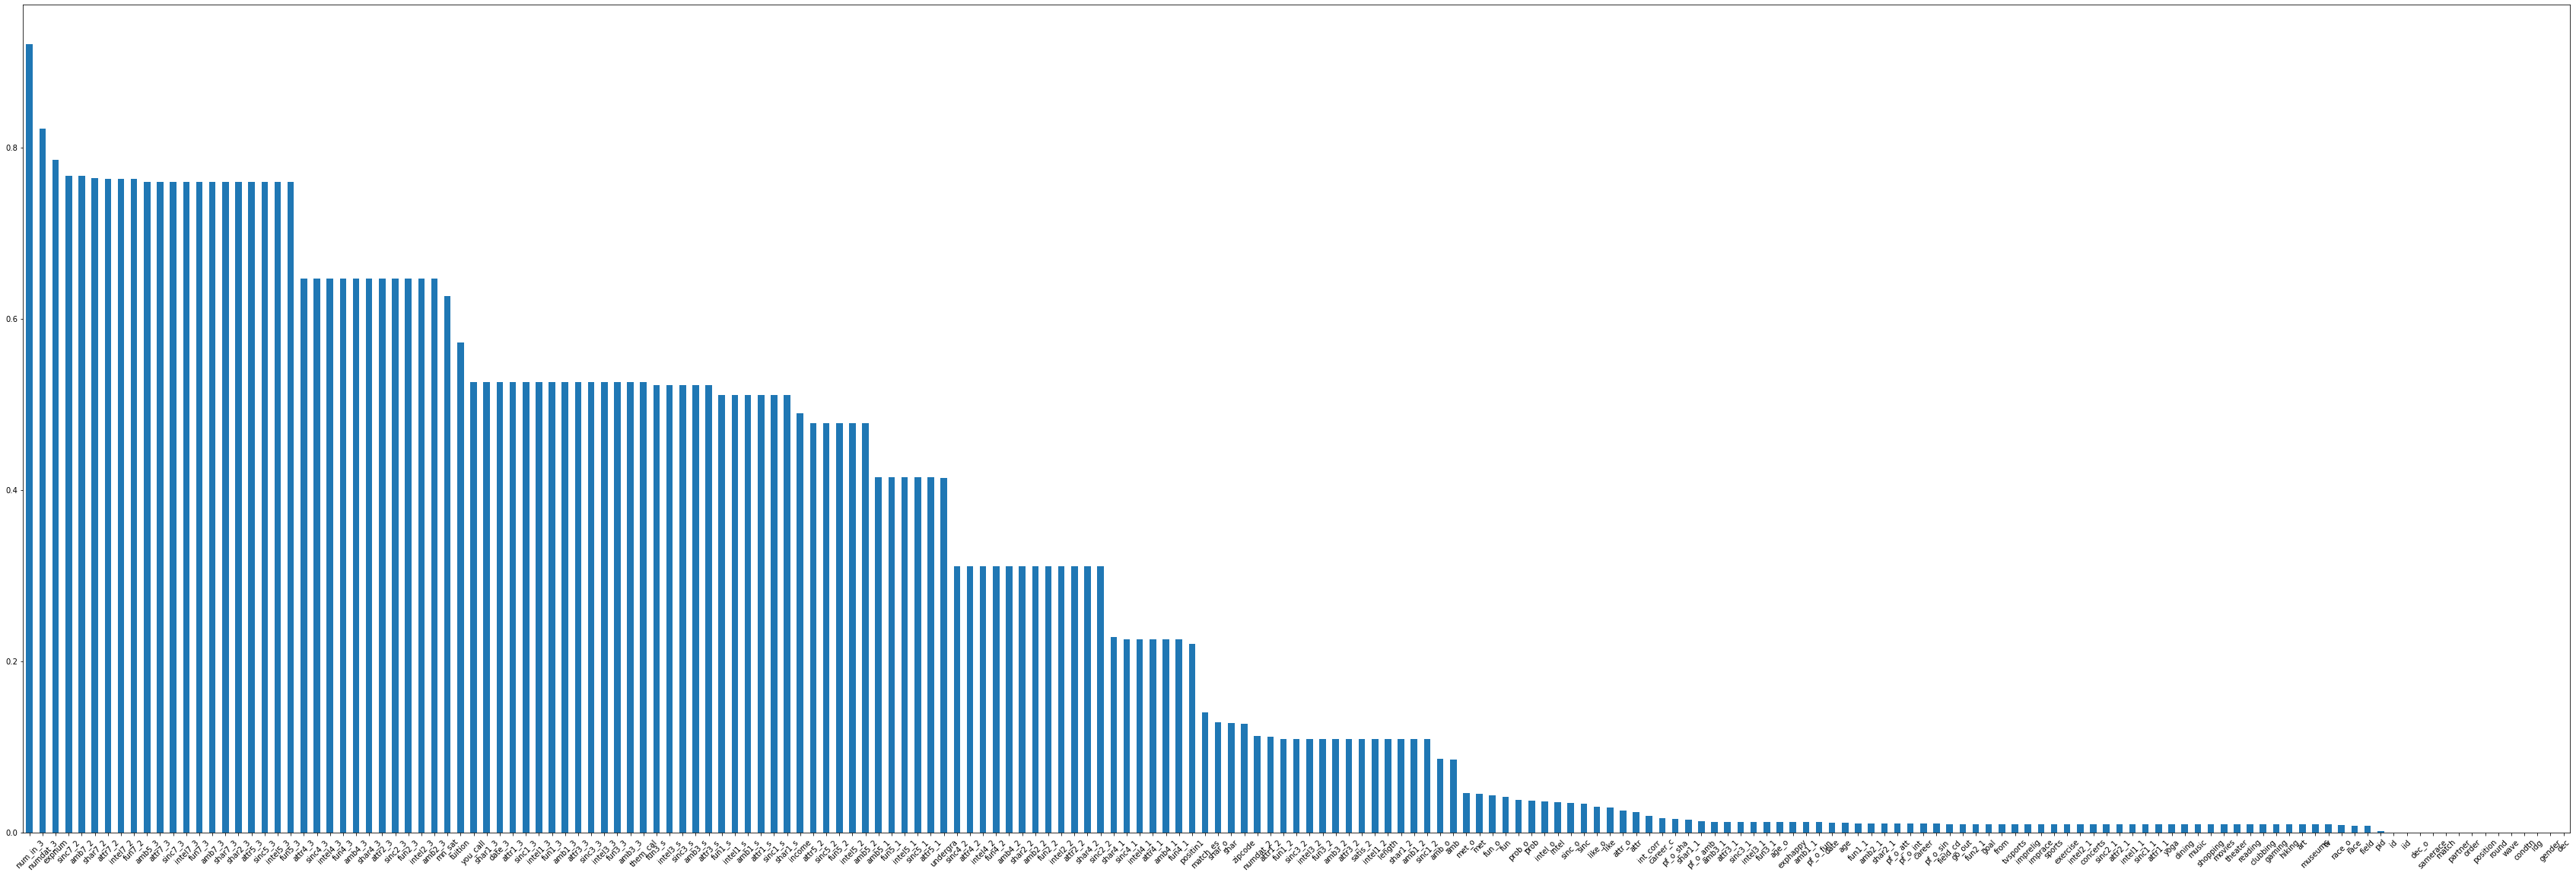

In [8]:
# Missing values graph 
(df.isnull().sum().sort_values(ascending = False)/len(df)).plot.bar(x='index', y='n', rot=45, figsize=(60,20));

In [9]:
miss_values_rate = 0.2
nb_columns_miss_values = (missing_values > miss_values_rate).sum()
print("{:4.2f}% of columns have {}% and more of missing values ({} columns out of 195).".format((nb_columns_miss_values/195)*100, miss_values_rate * 100, nb_columns_miss_values))

46.15% of columns have 20.0% and more of missing values (90 columns out of 195).


<p style = 'color:#00561B ; font-size: 150%'> Lightening the dataset by keeping relevant variables with enough data:<a name="P1"></a>

In [10]:
# Light df with variables having enough data
df_light = pd.concat([df.iloc[:, 0], df.iloc[:, 2], df.iloc[:, 11:17], df.iloc[:, 23], df.iloc[:, 33], 
                      df.iloc[:, 35], df.iloc[:, 39:42], df.iloc[:, 45:48], df.iloc[:, 49:67], df.iloc[:, 97:105], 
                      df.iloc[:, 106]], axis = 1)

In [11]:
df_light.shape

(8378, 44)

In [12]:
df_light.columns

Index(['iid', 'gender', 'pid', 'match', 'int_corr', 'samerace', 'age_o',
       'race_o', 'dec_o', 'age', 'field_cd', 'race', 'imprace', 'imprelig',
       'goal', 'date', 'go_out', 'career_c', 'sports', 'tvsports', 'exercise',
       'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading',
       'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga',
       'dec', 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'met'],
      dtype='object')

In [13]:
# Share of missing value for each variables of the df_light
(df_light.isnull().sum())/len(df_light)

iid         0.000000
gender      0.000000
pid         0.001194
match       0.000000
int_corr    0.018859
samerace    0.000000
age_o       0.012413
race_o      0.008713
dec_o       0.000000
age         0.011339
field_cd    0.009788
race        0.007520
imprace     0.009429
imprelig    0.009429
goal        0.009429
date        0.011578
go_out      0.009429
career_c    0.016472
sports      0.009429
tvsports    0.009429
exercise    0.009429
dining      0.009429
museums     0.009429
art         0.009429
hiking      0.009429
gaming      0.009429
clubbing    0.009429
reading     0.009429
tv          0.009429
theater     0.009429
movies      0.009429
concerts    0.009429
music       0.009429
shopping    0.009429
yoga        0.009429
dec         0.000000
attr        0.024111
sinc        0.033063
intel       0.035331
fun         0.041776
amb         0.084984
shar        0.127357
like        0.028646
met         0.044760
dtype: float64

<hr>

>This **df_light has a quite good data quality** with marginal rate of missing data.

<hr>

<p style = 'color:#00561B ; font-size: 200%'> 4. First observations on dataset<a name="P1"></a>

<hr>

<p style = 'color:#00561B ; font-size: 150%'> Key take away :<a name="P1"></a>

> **At total, the number of unique respondents is 551 persons who have participated to 8378 dates.** <br>
 
> Those attendees are **well balanced in terms of gender variable (as many men as women).** <br>
> The age distribution show a quite **strong 'concentration' of attendees with half of them aged between 24 and 28 years.** Despite it, the **age distribution follows a normal law with median age almost equal to mean age**: the median age of the participants is 26 years, and the mean age 26.4 years old. Women are slightly older than men with a median age of 27 years old vs 26 years old for men.<br>
> The **racial origin criteria show an unbalanced distribution of respondents with two dominants groups**: 57% belong to Caucasian american group, and 24% belong to Asian amerian group. <br>
> The **career expectation criteria also show an unbalanced distribution with two dominants areas**: 28% of attendees plan to pursue a career in Academic/Research, 26% in Business (finance, banking, marketing, consulting, business, CEO-Entrepreneur...). <br>
>> For the **rest of the analysis, only the gender and age criteria will be kept**.<br>
   
> Among the 8378 dates, **'only' 1380 were a 'match', representing a share of 16%.** This means that less than 2 speed dates out of 10 ended up on a second date.<br>
> One third of speed dating resulted on 'total unmatches' for both side (two participents agreed on no match) and half of it resulted on 'partial unmatches' (match for one person only).<br> 

> On the unique respondents basis, the 551 attendees have a 16.9% average match ratio, with half of attendees having a match ratio between 6% (Q1) and 24% (Q3), and a median (Q2) at 14%.<br>
> Among the respondents, we have some "lady-killer" who succeeded to match with more than 60% of the people met during the speed dating step!<br>
> **No significant gap, on match ratio, on demographics' criteria.**

<hr>

<p style = 'color:#00561B ; font-size: 150%'> First observations on dataset - Demographics<a name="P1"></a>

In [14]:
# Number of unique respondents to survey
nb_respondents = len(pd.unique(df_light['iid']))
print("{} persons have participated to the survey.".format(nb_respondents))

551 persons have participated to the survey.


In [15]:
# Number of men and women participaing to survey
nb_men = (df_light.groupby('iid')['gender'].min() == 0).sum()
nb_women = (df_light.groupby('iid')['gender'].min() == 1).sum()
print("{} men and {} women have participated to the survey.".format(nb_men, nb_women))

274 men and 277 women have participated to the survey.


/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


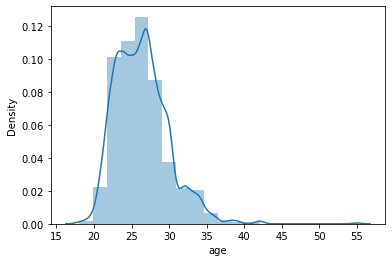

In [16]:
# Distribution of age
sns.distplot(df_light['age'], bins = 20);

In [17]:
# Age mean of respondents
age_mean = df_light['age'].mean()
age_median = df_light['age'].median()
print("The average age of respondents is {:4.2f} years old, and the median is {} years old.".format(age_mean, age_median))

The average age of respondents is 26.36 years old, and the median is 26.0 years old.


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


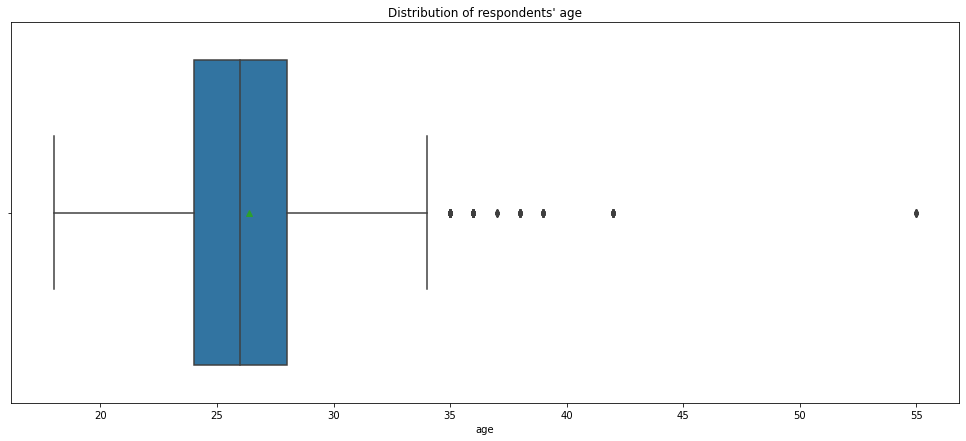

In [18]:
# Outliers on age of respondents
plt.figure(figsize=(17,7))
sns.boxplot(df_light['age'], showmeans = True);
plt.title("Distribution of respondents' age")
plt.show()

In [19]:
# Limit of boxplot Q1, Q2, Q3
df_light['age'].quantile([0.25,0.5,0.75])

0.25    24.0
0.50    26.0
0.75    28.0
Name: age, dtype: float64

Quite a strong concentration of the respondents with half of them aged between 24 years old and 28 years old.

In [20]:
# Share of outliers
outlier = df_light.groupby('iid')['age'].value_counts()
outlier_sum = outlier.groupby('age').sum()
outlier_share = outlier_sum.apply(lambda x : x if x > 34.0 else 0)
print("The share of outliers is {:4.2f}% of the total of dates.".format(100 - (outlier_share.sum() / outlier_sum.sum())*100))

The share of outliers is 1.18% of the total of dates.


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


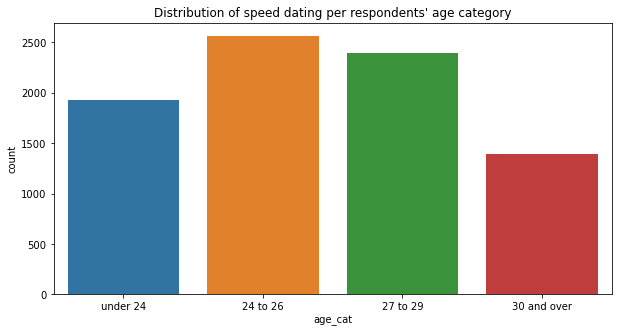

In [21]:
# Add age categories column in df_light
df_light['age_cat'] = df_light['age'].apply(lambda x : 'under 24' if x < 24
                                               else '24 to 26' if (x >= 24) & (x <=26)
                                               else '27 to 29' if (x >= 27) & (x <=29)
                                               else '30 and over' if x >= 30
                                               else None)
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(df_light['age_cat'], ax = ax).set(title="Distribution of speed dating per respondents' age category");

Those categories aggregate a significant volumes of speed dating and are quite balanced between age categories.

In [22]:
df_light['gender_cat'] = df_light['gender'].apply(lambda x : "Men" if x == 0
                                                             else "Women")
pd.crosstab(df_light['gender_cat'], df_light['age_cat'], normalize = 'columns')

age_cat,24 to 26,27 to 29,30 and over,under 24
gender_cat,,,,
Men,0.545348,0.411028,0.458781,0.568312
Women,0.454652,0.588972,0.541219,0.431688


In [23]:
# Average age according the gender
df_light.groupby('gender_cat')['age'].median()

gender_cat
Men      26.0
Women    27.0
Name: age, dtype: float64

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


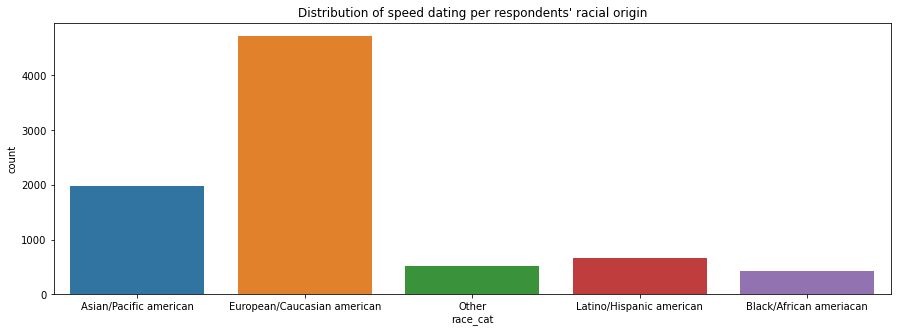

In [24]:
# Racial origin of respondents
df_light['race_cat'] = df_light['race'].apply(lambda x : 'Black/African ameriacan' if x == 1
                                              else 'European/Caucasian american' if x == 2
                                              else 'Latino/Hispanic american' if x == 3
                                              else 'Asian/Pacific american' if x == 4
                                              else 'Native american' if x == 5
                                              else 'Other' if x == 6
                                              else None)

fig, ax = plt.subplots(figsize=(15,5))
sns.countplot(df_light['race_cat'], ax = ax).set(title="Distribution of speed dating per respondents' racial origin");

Quite an unbalanced distribution of respondents' racial origin with two dominants groups: European/Caucasian american and Asian/Pacific american. 

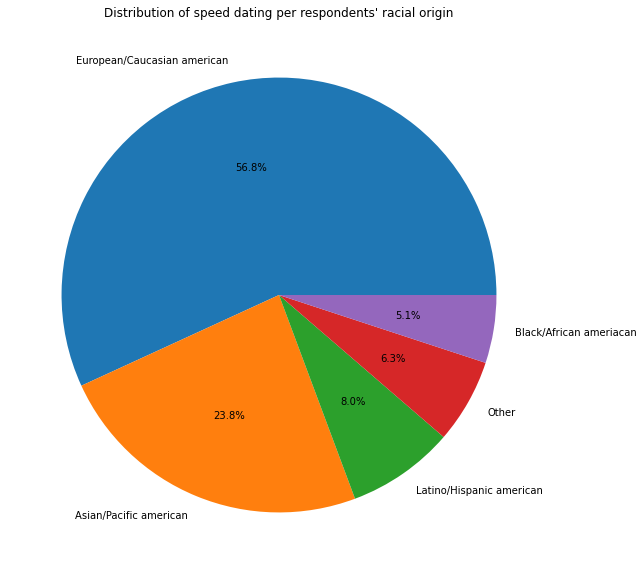

In [25]:
pie_chart_race = df_light['race_cat'].value_counts()
plt.figure(figsize=(10,10))
plt.pie(pie_chart_race.values, labels = pie_chart_race.index, autopct = '%1.1f%%')
plt.title("Distribution of speed dating per respondents' racial origin")
plt.show()

In [26]:
pd.crosstab(df_light['gender_cat'], df_light['race_cat'], normalize = 'columns')

race_cat,Asian/Pacific american,Black/African ameriacan,European/Caucasian american,Latino/Hispanic american,Other
gender_cat,,,,,
Men,0.527245,0.57381,0.466892,0.606928,0.469349
Women,0.472755,0.42619,0.533108,0.393072,0.530651


In [27]:
# Career intended of respondents

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


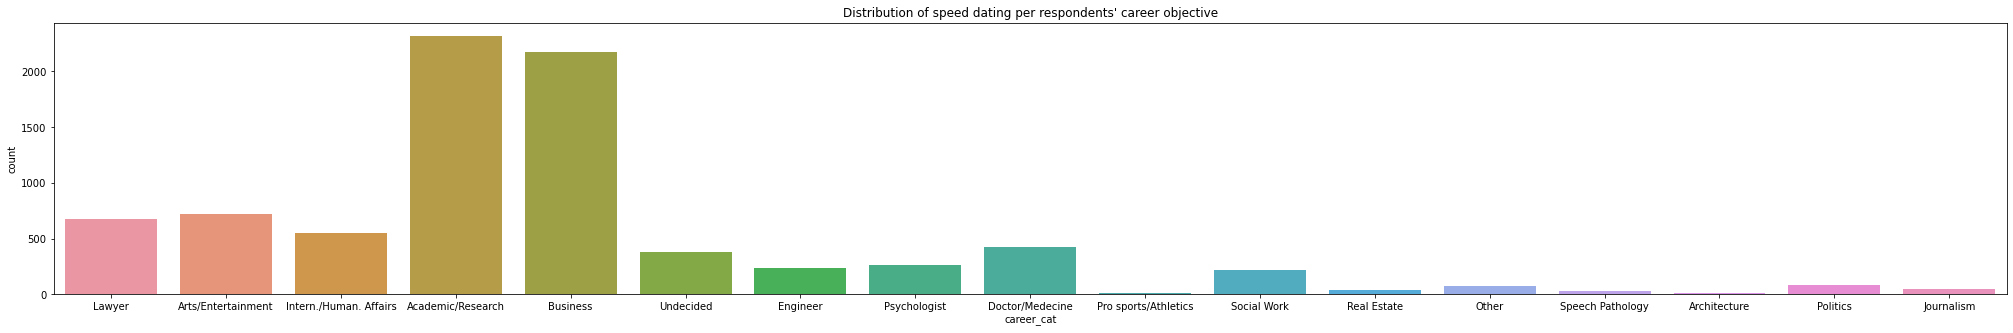

In [28]:
df_light['career_cat'] = df_light['career_c'].apply(lambda x : 'Lawyer' if x == 1
                                            else 'Academic/Research' if x == 2
                                            else 'Psychologist' if x == 3
                                            else 'Doctor/Medecine' if x == 4
                                            else 'Engineer' if x == 5
                                            else 'Arts/Entertainment' if x == 6
                                            else 'Business' if x == 7
                                            else 'Real Estate' if x == 8
                                            else 'Intern./Human. Affairs' if x == 9
                                            else 'Undecided' if x == 10
                                            else 'Social Work' if x == 11
                                            else 'Speech Pathology' if x == 12
                                            else 'Politics' if x == 13
                                            else 'Pro sports/Athletics' if x == 14
                                            else 'Other' if x == 15
                                            else 'Journalism' if x == 16
                                            else 'Architecture' if x == 17
                                            else None)


fig, ax = plt.subplots(figsize=(35,5))
sns.countplot(df_light['career_cat'], ax = ax).set(title="Distribution of speed dating per respondents' career objective");

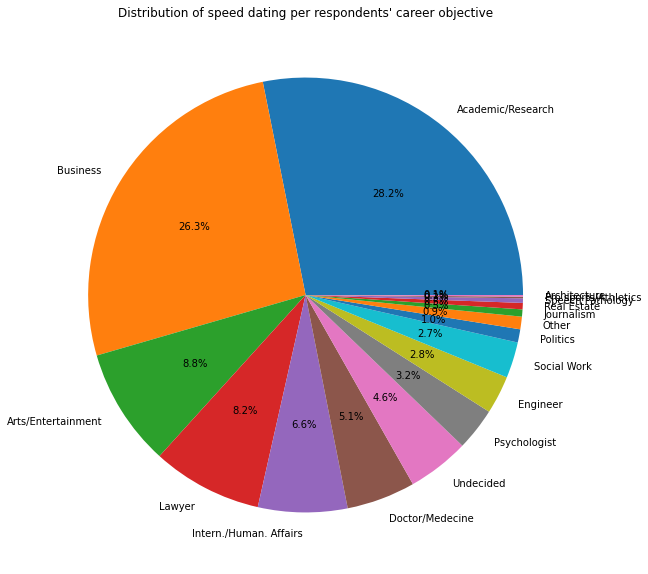

In [29]:
pie_chart_career = df_light['career_cat'].value_counts()
plt.figure(figsize=(10,10))
plt.pie(pie_chart_career.values, labels = pie_chart_career.index, autopct = '%1.1f%%')
plt.title("Distribution of speed dating per respondents' career objective")
plt.show()

In [30]:
pd.crosstab(df_light['gender_cat'], df_light['career_cat'], normalize = 'columns')

career_cat,Academic/Research,Architecture,Arts/Entertainment,Business,Doctor/Medecine,Engineer,Intern./Human. Affairs,Journalism,Lawyer,Other,Politics,Pro sports/Athletics,Psychologist,Real Estate,Social Work,Speech Pathology,Undecided
gender_cat,,,,,,,,,,,,,,,,,
Men,0.550862,0.0,0.549724,0.271429,0.579572,0.431624,0.73309,1.0,0.377778,0.181818,0.493827,0.0,0.923372,0.0,1.0,1.0,0.612137
Women,0.449138,1.0,0.450276,0.728571,0.420428,0.568376,0.26691,0.0,0.622222,0.818182,0.506173,1.0,0.076628,1.0,0.0,0.0,0.387863


<p style = 'color:#00561B ; font-size: 150%'> First observations on dataset - Match ratio<a name="P1"></a>

In [31]:
# Ratio of second date among total speed dating
df_light['match'].value_counts(normalize = True).mul(100)

0    83.528288
1    16.471712
Name: match, dtype: float64

In [32]:
# Split of data between interviewee decision regarding its date (variable 'dec') and 
# decision of the date partner regarding the interviewee (variable 'dec_o')
pd.crosstab(df_light['dec_o'], df_light['dec'])

dec,0,1
dec_o,,
0,2725,2138
1,2135,1380


In [33]:
pd.crosstab(df_light['dec_o'], df_light['dec'], normalize = 'all')

dec,0,1
dec_o,,
0,0.325257,0.255192
1,0.254834,0.164717


> 1380 matches / second dates ended up after the speed dating step.

> Which 'only' represent 16% of the total speed dating done. One third of speed dating resulted on 'total unmatches' for both side (two participents agreed on no match) and half of it resulted on 'partial unmatches' (match for one person only). 

In [34]:
# Average of second date per respondent / participant
df_light.groupby('iid')['match'].sum().mean()

2.50453720508167

In [35]:
# Match ratio for second date per respondent / participant
match_ratio_per_respondent = df_light.groupby('iid')['match'].mean().mean()
print(match_ratio_per_respondent)

0.16892764517298878


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


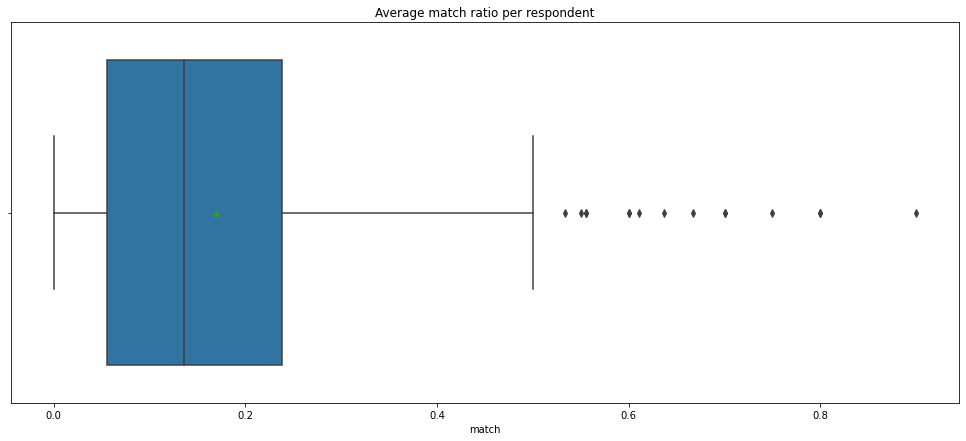

In [36]:
plt.figure(figsize=(17,7))
sns.boxplot(df_light.groupby('iid')['match'].mean(), showmeans = True);
plt.title("Average match ratio per respondent")
plt.show()

In [37]:
df_light.groupby('iid')['match'].mean().quantile([0.25,0.5,0.75])

0.25    0.055556
0.50    0.136364
0.75    0.238095
Name: match, dtype: float64

> The majority of respondents have a match ratio between 6% and 24% out of all the speed dating done, with a median at 14% and a mean at 17%.

> Among the respondents, we have some "lady-killer" who succeeded to match with more than 60% of the people met during the speed dating step!

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1224x720 with 0 Axes>

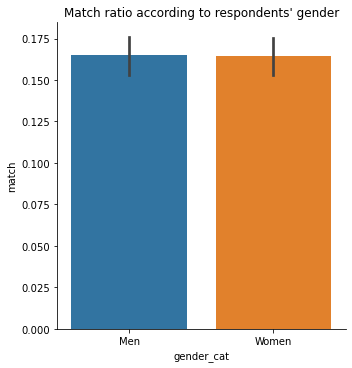

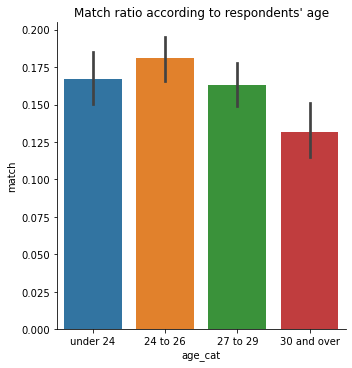

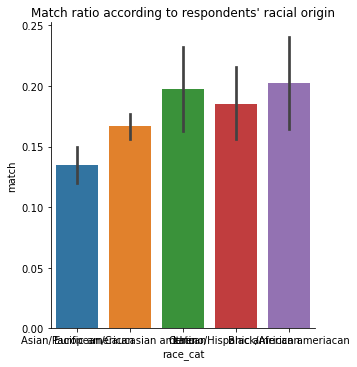

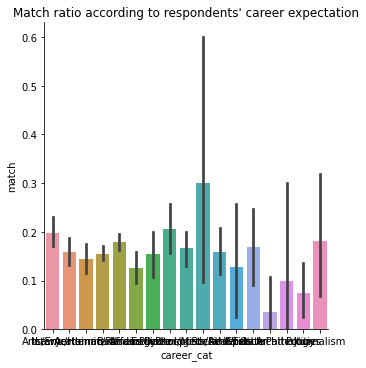

In [38]:
plt.figure(figsize=(17,10))

sns.catplot(x="gender_cat", y="match", data=df_light, kind='bar', estimator=np.mean, ci=95);
plt.title("Match ratio according to respondents' gender")

sns.catplot(x="age_cat", y="match", data=df_light, kind='bar', estimator=np.mean, ci=95);
plt.title("Match ratio according to respondents' age")

sns.catplot(x="race_cat", y="match", data=df_light, kind='bar', estimator=np.mean, ci=95);
plt.title("Match ratio according to respondents' racial origin")

sns.catplot(x="career_cat", y="match", data=df_light, kind='bar', estimator=np.mean, ci=95);
plt.title("Match ratio according to respondents' career expectation")

plt.show

> No major demographic significant differences in terms of match ratio. To be noted that Asia/Pacific american and older participants (30 years old and over) seem to register a significant lower match ratio: more demanding people or bad seducer?

<p style = 'color:#00561B ; font-size: 200%'> 5. Description of the six attributes<a name="P1"></a>

<hr>

<p style = 'color:#00561B ; font-size: 150%'> Key take away :<a name="P1"></a>

> Each attendees evaluated their speed dating partner on six criteria: attractiveness, sincerity, intelligence, fun, ambition and shared interests/hobbies. **Based on the attendees willing to see the partner in a second date (variable 'match' == 1)**, the average attributes' scores observed are the following: <br>
    - Attractiveness = 7.34 / 10<br>
    - Sincerity = 7.76 / 10<br>
    - Intelligence = 7.90 / 10<br>
    - Fun = 7.55 / 10<br>
    - Ambition = 7.31 / 10<br>
    - Shared interests/hobbies = 6.73 / 10<br>
People, ready to see each other again, give **globally high rates to the six attributes (> 7) with highest ones for the 'intelligence' and 'sincerity' attributes.**<br>
 
> **Significant gaps are observed on the gender criteria**:<br>
    - women give a highest score on attractiveness attribute (7.5 vs 7.1 for men). When they agree to see the partner again, women are more enthusiastic on the physiscal appearance than men... and probably more honest that men!<br>
    - men value more the intelligence and ambition attributes in their decision than women: with a 8.1 rate on intelligence (vs 7.8 for women) and 7.5 on ambition (vs 7.2 for women).<br>

> **<span style="color:#00561B"><u>But are those attributes (with the highest scores) are the ones that drive the most the second date obtention?<u>**

<hr>

In [39]:
# Creation of a df based on match == 1
df_match = df_light.loc[df_light['match'] == 1]

In [40]:
df_match.shape

(1380, 48)

In [41]:
attractive = round(df_match.groupby('iid')['attr'].mean().mean(), 2)
print(attractive)

7.34


<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1800x720 with 0 Axes>

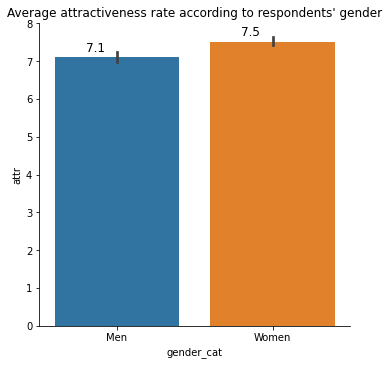

<Figure size 1800x720 with 0 Axes>

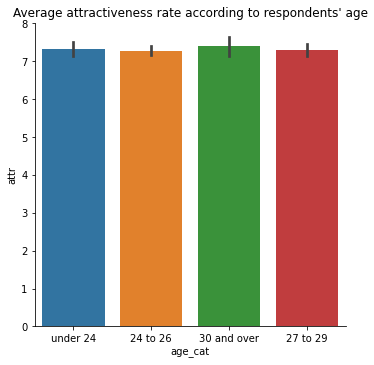

In [42]:
plt.figure(figsize=(25,10));
g = sns.catplot(x="gender_cat", y="attr", data=df_match, kind='bar', estimator=np.mean, ci=95);
plt.title("Average attractiveness rate according to respondents' gender");
ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.2, 
            p.get_height() * 1.02, 
           '{0:.1f}'.format(p.get_height()),   #Used to format it K representation
            color='black', 
            rotation='horizontal', 
            size='large')

plt.figure(figsize=(25,10));
sns.catplot(x="age_cat", y="attr", data=df_match, kind='bar', estimator=np.mean, ci=95);
plt.title("Average attractiveness rate according to respondents' age")

plt.show

In [43]:
sincere = round(df_match.groupby('iid')['sinc'].mean().mean(), 2)
print(sincere)

7.76


<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1800x720 with 0 Axes>

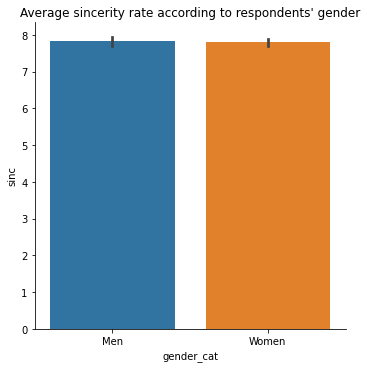

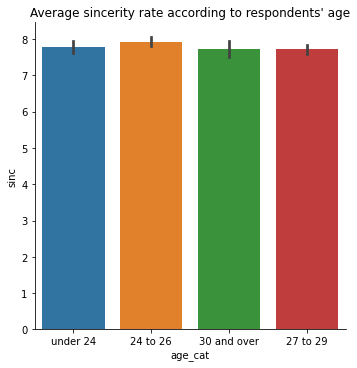

In [44]:
plt.figure(figsize=(25,10));

sns.catplot(x="gender_cat", y="sinc", data=df_match, kind='bar', estimator=np.mean, ci=95);
plt.title("Average sincerity rate according to respondents' gender");

sns.catplot(x="age_cat", y="sinc", data=df_match, kind='bar', estimator=np.mean, ci=95);
plt.title("Average sincerity rate according to respondents' age")

plt.show

In [45]:
intelligence = round(df_match.groupby('iid')['intel'].mean().mean(), 2)
print(intelligence)

7.9


<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1800x720 with 0 Axes>

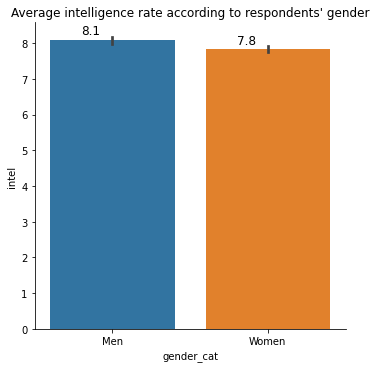

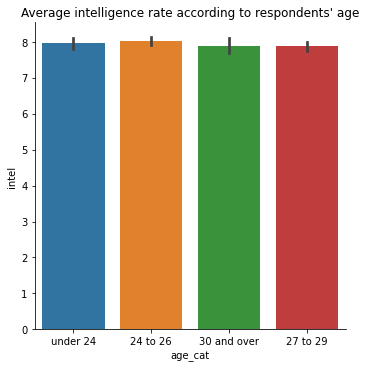

In [46]:
plt.figure(figsize=(25,10));

g = sns.catplot(x="gender_cat", y="intel", data=df_match, kind='bar', estimator=np.mean, ci=95);
plt.title("Average intelligence rate according to respondents' gender");
ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.2, 
            p.get_height() * 1.02, 
           '{0:.1f}'.format(p.get_height()),   #Used to format it K representation
            color='black', 
            rotation='horizontal', 
            size='large')

sns.catplot(x="age_cat", y="intel", data=df_match, kind='bar', estimator=np.mean, ci=95);
plt.title("Average intelligence rate according to respondents' age")

plt.show

In [47]:
fun = round(df_match.groupby('iid')['fun'].mean().mean(), 2)
print(fun)

7.55


<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1800x720 with 0 Axes>

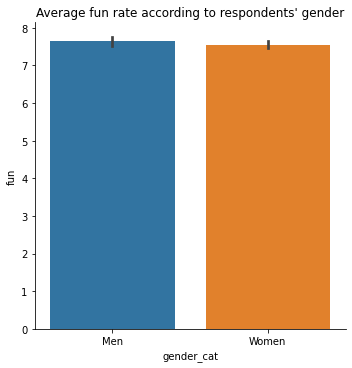

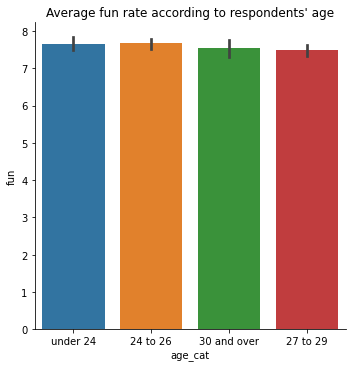

In [48]:
plt.figure(figsize=(25,10));

sns.catplot(x="gender_cat", y="fun", data=df_match, kind='bar', estimator=np.mean, ci=95);
plt.title("Average fun rate according to respondents' gender");

sns.catplot(x="age_cat", y="fun", data=df_match, kind='bar', estimator=np.mean, ci=95);
plt.title("Average fun rate according to respondents' age")

plt.show

In [49]:
ambition = round(df_match.groupby('iid')['amb'].mean().mean(), 2)
print(ambition)

7.31


<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1800x720 with 0 Axes>

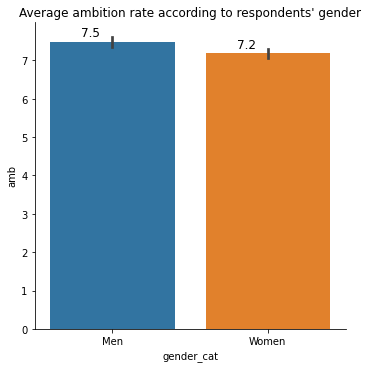

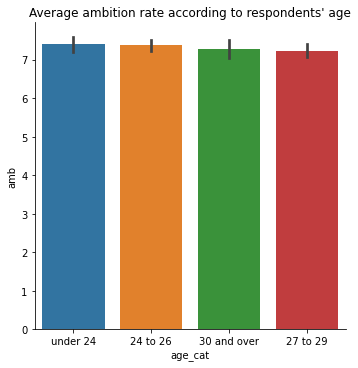

In [50]:
plt.figure(figsize=(25,10));

g = sns.catplot(x="gender_cat", y="amb", data=df_match, kind='bar', estimator=np.mean, ci=95);
plt.title("Average ambition rate according to respondents' gender");
ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.2, 
            p.get_height() * 1.02, 
           '{0:.1f}'.format(p.get_height()),   #Used to format it K representation
            color='black', 
            rotation='horizontal', 
            size='large')

sns.catplot(x="age_cat", y="amb", data=df_match, kind='bar', estimator=np.mean, ci=95);
plt.title("Average ambition rate according to respondents' age")

plt.show

In [51]:
shared_interests = round(df_match.groupby('iid')['shar'].mean().mean(), 2)
print(shared_interests)

6.73


<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1800x720 with 0 Axes>

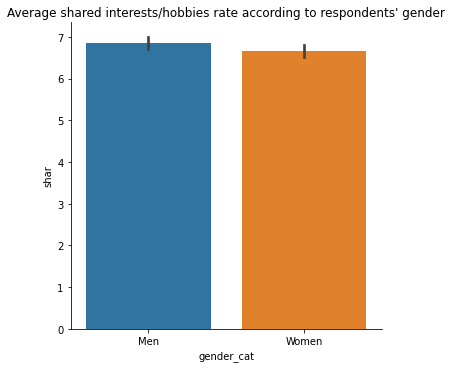

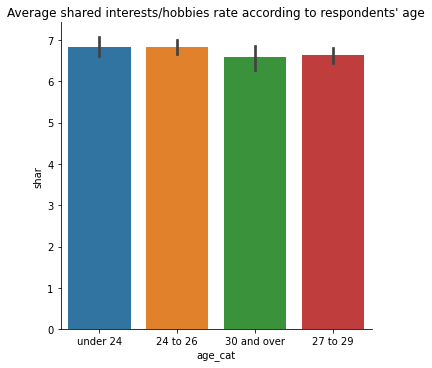

In [52]:
plt.figure(figsize=(25,10));

sns.catplot(x="gender_cat", y="shar", data=df_match, kind='bar', estimator=np.mean, ci=95);
plt.title("Average shared interests/hobbies rate according to respondents' gender");

sns.catplot(x="age_cat", y="shar", data=df_match, kind='bar', estimator=np.mean, ci=95);
plt.title("Average shared interests/hobbies rate according to respondents' age")

plt.show

In [53]:
# Recap of the attributes' average score based on attendees willing to see the partner in a second date
attributes_scores_table = pd.DataFrame({
    "Attractiveness" : [attractive],
    "Sincerity" : [sincere],
    "Intelligence" : [intelligence],
    "Fun" : [fun],
    "Ambition" : [ambition],
    "Shared interests/hobbies" : [shared_interests]},
    index = ["Average attributes scores"])
print(attributes_scores_table)

                           Attractiveness  Sincerity  Intelligence   Fun  \
Average attributes scores            7.34       7.76           7.9  7.55   

                           Ambition  Shared interests/hobbies  
Average attributes scores      7.31                      6.73  


<p style = 'color:#00561B ; font-size: 200%'> 6. Identification of variables driving the decision for a second date<a name="P1"></a>

<hr>

<p style = 'color:#00561B ; font-size: 150%'> Key take away :<a name="P1"></a>

> The correlation analysis will help us to identify the variables, among the dataframe 'df_light', that **correlate the most with the 'match' variable**. This last variable reflect the agreement of the both attendees for seeing each other again.  <br>
Among the top 10 variables that correlate the most with 'match', we **find our six key variables but with a different order of importance (vs attributes' average scores on point 5)**:<br>
    - fun, shared interests/hobbies and attractiveness are the ones with correlation rates higher than 0.25.<br> 
    - the **'like' variable also appears key to drive a match**: the highest the like rate is, the highest the probability to get a match is. <br>
    - the 'like' variable is strongly correlated with the 3 variables, identified on first point, with correlation rates higher than 0.6: **the more the partner is seen/perceived as fun, attractive and with shared interests, the higher the probability of like him/her is and the higher the probably of match will be.** <br>
    
> **<span style="color:#00561B"><u>The visualization of the logistic regression for fun, shared interests/hobbies and attractiveness variables show that the highest the score is, the closer the match is.<u>** <br>

<hr>

<p style = 'color:#00561B ; font-size: 150%'> Correlation matrix with all variables of df_light<a name="P1"></a>

In [54]:
# Correlation matrix
corr_matrix = df_light.corr()

In [55]:
# Heatmap
#f, ax = plt.subplots(figsize=(40,40))
#sns.heatmap(corr_matrix, annot = True, ax = ax);

In [56]:
corr_target = abs(corr_matrix['match'])
relevant_features = corr_target[corr_target > 0]
print(relevant_features.sort_values(ascending = False))

match       1.000000
dec_o       0.522326
dec         0.521943
like        0.305723
fun         0.277545
shar        0.270679
attr        0.260676
intel       0.169532
sinc        0.164449
amb         0.140042
date        0.063610
go_out      0.060526
clubbing    0.055435
imprace     0.049032
yoga        0.036601
age_o       0.035865
age         0.035055
dining      0.033912
art         0.031545
int_corr    0.031121
met         0.027670
concerts    0.027034
imprelig    0.026014
field_cd    0.024641
hiking      0.024143
music       0.023093
movies      0.022989
sports      0.021666
reading     0.020222
career_c    0.018112
pid         0.016343
iid         0.015806
museums     0.014954
tv          0.014542
gaming      0.013543
race        0.013268
race_o      0.013088
samerace    0.013028
goal        0.010306
exercise    0.009470
tvsports    0.004472
shopping    0.001333
gender      0.000530
theater     0.000087
Name: match, dtype: float64


<p style = 'color:#00561B ; font-size: 150%'> Visualization of the correlation matrix for the 6 variables<a name="P1"></a>

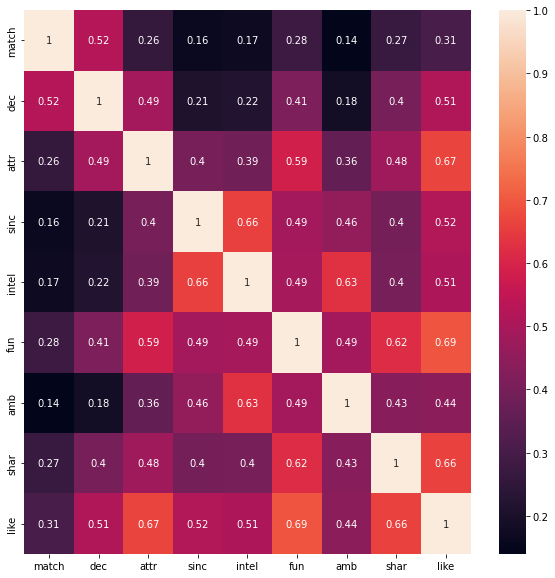

In [57]:
# df attributes
df_attributes = pd.concat([df.iloc[:, 12],df.iloc[:, 97:105]],axis = 1)
# Correlation matrix
corr_matrix_attributes = df_attributes.corr()
# Heatmap
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr_matrix_attributes, annot = True, ax = ax);

In [58]:
corr_attributes = abs(corr_matrix_attributes['match'])
relevant_attributes = corr_attributes[corr_attributes > 0]
print(relevant_attributes.sort_values(ascending = False))

match    1.000000
dec      0.521943
like     0.305723
fun      0.277545
shar     0.270679
attr     0.260676
intel    0.169532
sinc     0.164449
amb      0.140042
Name: match, dtype: float64


<p style = 'color:#00561B ; font-size: 150%'> Visualization of the relationship between 'match' variable and the attributes<a name="P1"></a>

/opt/conda/lib/python3.9/site-packages/statsmodels/compat/pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


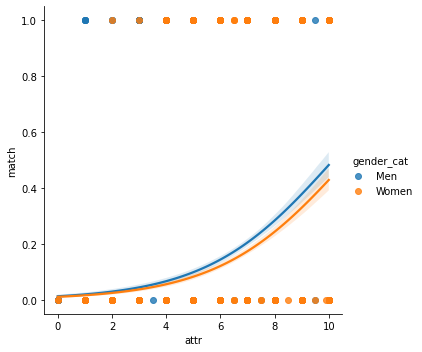

In [59]:
sns.lmplot(x = 'attr', y = 'match', data = df_light, hue = 'gender_cat', logistic = True)

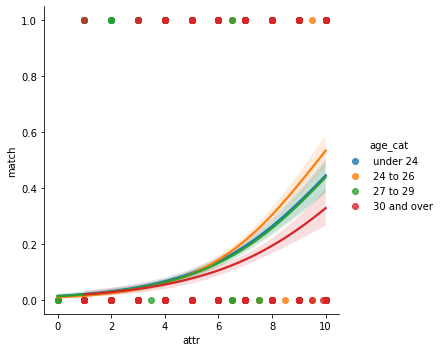

In [60]:
sns.lmplot(x = 'attr', y = 'match', data = df_light, hue = 'age_cat', logistic = True)

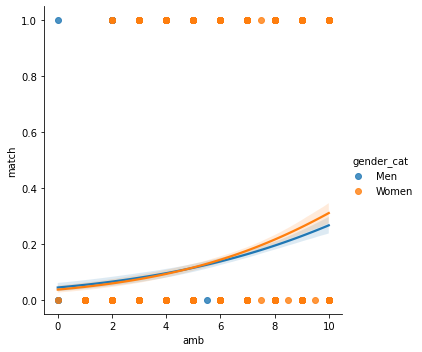

In [61]:
sns.lmplot(x = 'amb', y = 'match', data = df_light, hue = 'gender_cat', logistic = True)

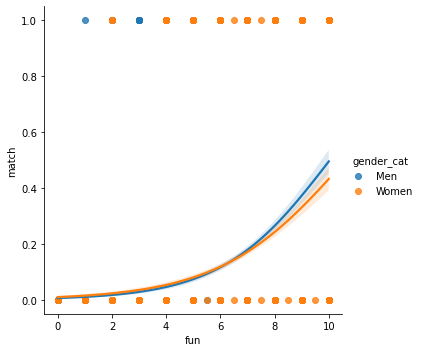

In [62]:
sns.lmplot(x = 'fun', y = 'match', data = df_light, hue = 'gender_cat', logistic = True)

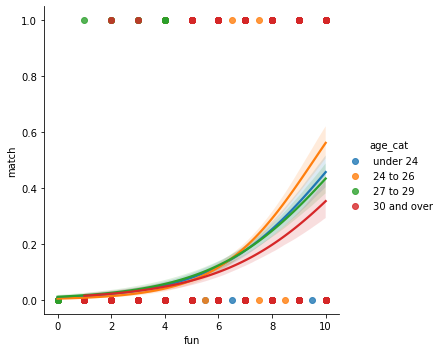

In [63]:
sns.lmplot(x = 'fun', y = 'match', data = df_light, hue = 'age_cat', logistic = True)

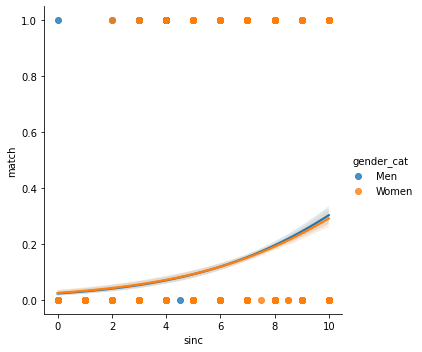

In [64]:
sns.lmplot(x = 'sinc', y = 'match', data = df_light, hue = 'gender_cat', logistic = True)

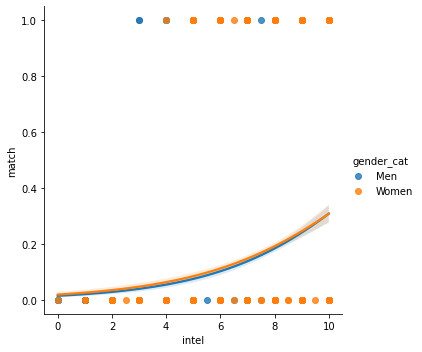

In [65]:
sns.lmplot(x = 'intel', y = 'match', data = df_light, hue = 'gender_cat', logistic = True)

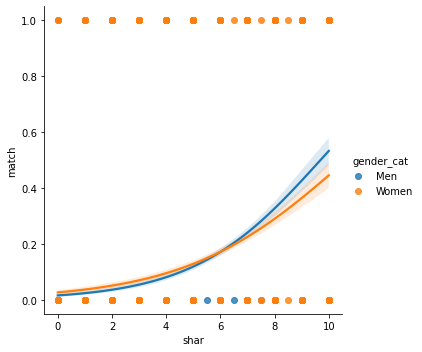

In [66]:
sns.lmplot(x = 'shar', y = 'match', data = df_light, hue = 'gender_cat', logistic = True)

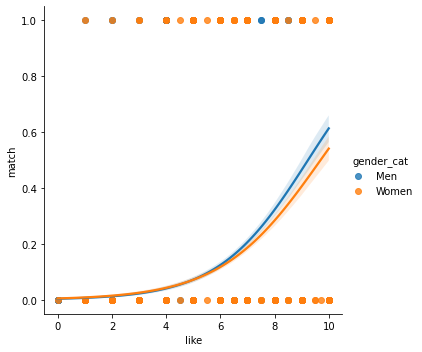

In [67]:
sns.lmplot(x = 'like', y = 'match', data = df_light, hue = 'gender_cat', logistic = True)

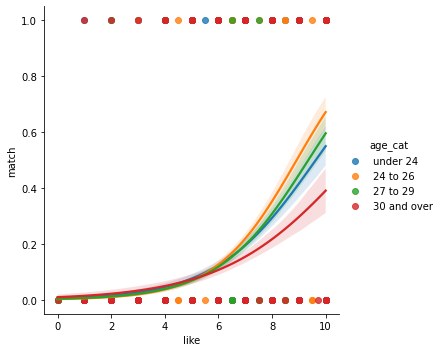

In [68]:
sns.lmplot(x = 'like', y = 'match', data = df_light, hue = 'age_cat', logistic = True)

<p style = 'color:#E6E4E7 ; background-color:#00561B ; font-size: 150%'> In conclusion, a like and then a match is very unlikely if there is no physical chemestry (attractiveness), no common interests (shared interests/hobbies) and no amusement (fun).